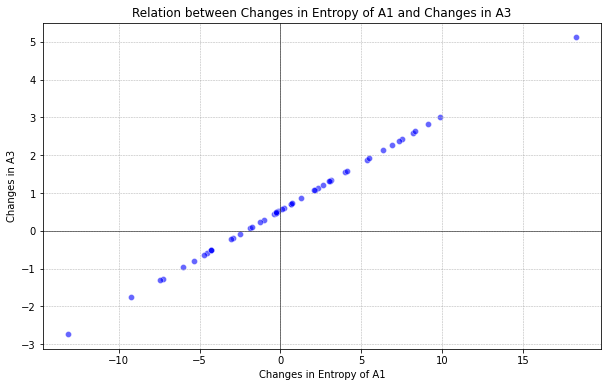

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Compute entropy
def entropy(activations):
    return -np.sum(activations * np.log(activations + 1e-10))

# Simulate the change in weights based on change in entropy
def delta_weights(delta_entropy, lambda_w=0.5, alpha_w=0.5, beta_w=0.1):
    delta_f = delta_entropy  # Assuming a linear relationship
    return lambda_w + (1 - lambda_w) * (alpha_w * delta_f + beta_w)

# Simulations
num_samples = 1000
num_trials = 50
delta_entropies = []
delta_ws = []

for _ in range(num_trials):
    x_in_old = np.random.rand(num_samples)
    x_in_new = np.random.rand(num_samples)
    
    entropy_old = entropy(x_in_old)
    entropy_new = entropy(x_in_new)
    delta_entropy = entropy_new - entropy_old
    
    delta_entropies.append(delta_entropy)
    delta_ws.append(delta_weights(delta_entropy))

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(delta_entropies, delta_ws, c='blue', alpha=0.6, edgecolors="w", linewidth=0.5)
plt.title('Relation between Changes in Entropy of A1 and Changes in A3')
plt.xlabel('Changes in Entropy of A1')
plt.ylabel('Changes in A3')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.show()


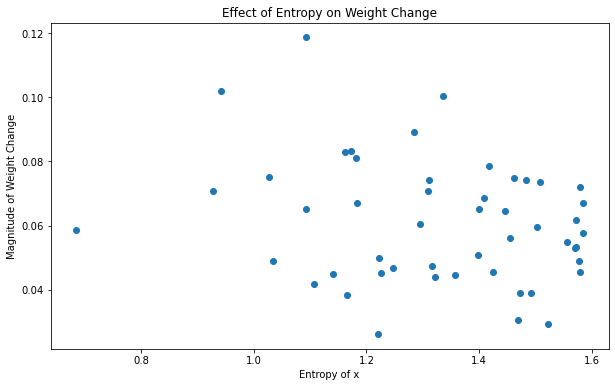

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_entropy(x):
    return -np.sum(x * np.log2(x))

def weight_change(x, y, eta=0.1):
    return eta * np.outer(x, y)

# Generate random x and y vectors with increasing entropy for x
np.random.seed(42)
n_points = 50

# Initialize lists to hold entropy and weight change magnitudes
entropy_list = []
weight_change_magnitude = []

for _ in range(n_points):
    # Generate random normalized vectors x and y
    x = np.random.rand(3)
    y = np.random.rand(3)
    x /= np.sum(x)
    
    # Calculate entropy of x
    entropy = calculate_entropy(x)
    
    # Calculate weight change delta_W
    delta_W = weight_change(x, y)
    
    # Calculate magnitude of weight change
    magnitude = np.linalg.norm(delta_W)
    
    # Append to lists
    entropy_list.append(entropy)
    weight_change_magnitude.append(magnitude)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(entropy_list, weight_change_magnitude)
plt.xlabel('Entropy of x')
plt.ylabel('Magnitude of Weight Change')
plt.title('Effect of Entropy on Weight Change')
plt.show()



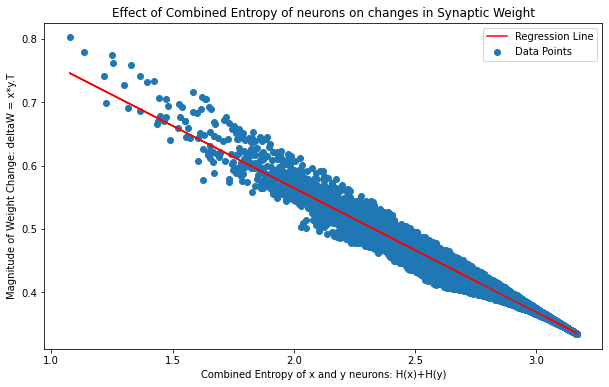

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_entropy(x):
    return -np.sum(x * np.log2(x))

def weight_change(x, y, eta=1):
    return eta * np.outer(x, y)

# Generate random x and y vectors
np.random.seed(42)
n_points = 10000

# Initialize lists to hold entropy and weight change magnitudes
combined_entropy_list = []
weight_change_magnitude = []

for _ in range(n_points):
    # Generate random normalized vectors x and y
    x = np.random.rand(3)
    y = np.random.rand(3)
    x /= np.sum(x)
    y /= np.sum(y)
    
    # Calculate entropy of x and y
    entropy_x = calculate_entropy(x)
    entropy_y = calculate_entropy(y)
    
    # Combine entropies (you could also average them)
    combined_entropy = entropy_x + entropy_y
    
    # Calculate weight change delta_W
    delta_W = weight_change(x, y)
    
    # Calculate magnitude of weight change
    magnitude = np.linalg.norm(delta_W)
    
    # Append to lists
    combined_entropy_list.append(combined_entropy)
    weight_change_magnitude.append(magnitude)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(combined_entropy_list, weight_change_magnitude, label='Data Points')

# Fit a linear regression model and plot it
coefficients = np.polyfit(combined_entropy_list, weight_change_magnitude, 1)
y_fit = np.polyval(coefficients, combined_entropy_list)
plt.plot(combined_entropy_list, y_fit, color='red', label='Regression Line')

plt.xlabel('Combined Entropy of x and y neurons: H(x)+H(y)')
plt.ylabel('Magnitude of Weight Change: deltaW = x*y.T')
plt.title('Effect of Combined Entropy of neurons on changes in Synaptic Weight')
plt.legend()
plt.savefig('/Users/ali/Desktop/Experiment/LC HL.png', dpi=300, facecolor='white', edgecolor='white')
 
plt.show()

